# IPL Score Prediction using Machine Learning

This Machine Learning model adapts a Regression Approach to predict the score of the First Inning of an IPL Match.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [2]:
#Importing dataset
ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (83118, 15)


# Exploratory Data Analysis

In [3]:
# First 5 Columns Data
ipl_df.head()
ipl_df['wickets_last_5']=0
ipl_df['runs_last_5']=0
ipl_df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,0,0,0,0,222
1,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,0,0,0,0,222
2,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,0,0,0,0,222
3,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,0,0,0,0,222
4,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,0,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83113,NaN,29-05-2022,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,DA Miller,R Ashwin,124,3,17.3,0,0,40,27,133
83114,NaN,29-05-2022,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,Shubman Gill,R Ashwin,124,3,17.4,0,0,40,27,133
83115,NaN,29-05-2022,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,Shubman Gill,R Ashwin,125,3,17.5,0,0,46,0,133
83116,NaN,29-05-2022,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,DA Miller,R Ashwin,127,3,17.6,0,0,47,1,133


In [4]:
# Describing the ipl_dfset
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,83118.000000,83118.000000,83118.000000,83118.0,83118.0,83118.000000,83118.000000,83118.000000
mean,308.627740,75.020032,2.399769,9.780830,0.0,0.0,24.163924,8.860788,161.597211
std,178.156878,49.044761,2.009214,5.769752,0.0,0.0,19.676529,10.745255,28.999378
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,0.0,0.0,9.000000,1.000000,142.000000
50%,308.000000,71.000000,2.000000,9.600000,0.0,0.0,20.000000,5.000000,163.000000
75%,463.000000,111.000000,4.000000,14.600000,0.0,0.0,34.000000,13.000000,182.000000
max,617.000000,263.000000,10.000000,19.800000,0.0,0.0,175.000000,109.000000,263.000000


In [5]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83118 entries, 0 to 83117
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  float64
 1   date            83118 non-null  object 
 2   venue           83118 non-null  object 
 3   bat_team        83118 non-null  object 
 4   bowl_team       83118 non-null  object 
 5   batsman         83118 non-null  object 
 6   bowler          83118 non-null  object 
 7   runs            83118 non-null  int64  
 8   wickets         83118 non-null  int64  
 9   overs           83118 non-null  float64
 10  runs_last_5     83118 non-null  int64  
 11  wickets_last_5  83118 non-null  int64  
 12  striker         83118 non-null  int64  
 13  non-striker     83118 non-null  int64  
 14  total           83118 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 9.5+ MB


In [6]:
# Number of Unique Values in each column
ipl_df.nunique()

mid               617
date              470
venue              41
bat_team           16
bowl_team          16
batsman           480
bowler            382
runs              252
wickets            11
overs             183
runs_last_5         1
wickets_last_5      1
striker           155
non-striker        88
total             139
dtype: int64

In [7]:
# ipl_df types of all Columns
ipl_df.dtypes

mid               float64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

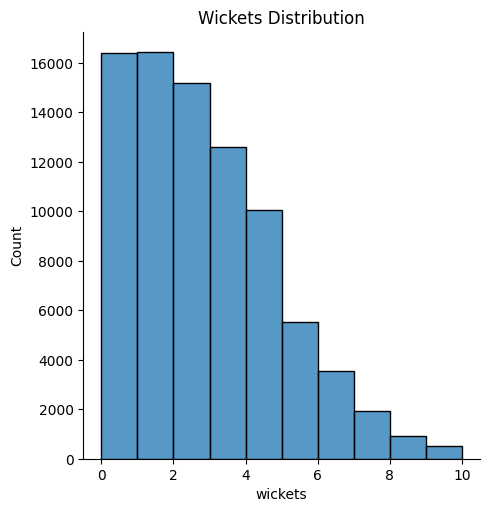

In [8]:
#Wickets Distribution
sns.displot(ipl_df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

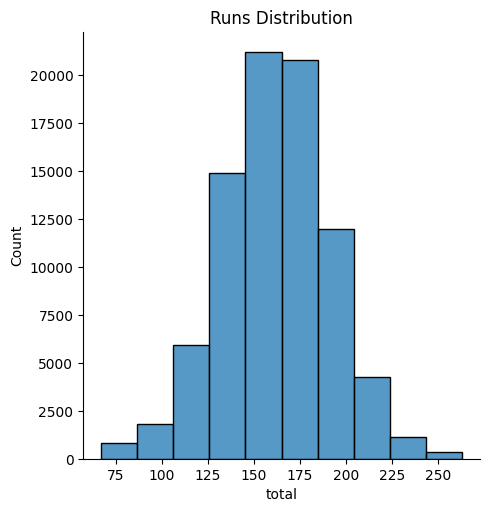

In [9]:
#Runs Distribution
sns.displot(ipl_df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

# Data Cleaning

#### Removing Irrelevant Data colunms

In [10]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [11]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (83118, 15)
After Removing Irrelevant Columns : (83118, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,0,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,0,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,0,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,0,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,0,0,222


#### Keeping only Consistent Teams 


In [12]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
              'Delhi Capitals', 'Sunrisers Hyderabad', 'Gujarat Titans', 'Lucknow Super Giants']

In [13]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (83118, 8)
After Removing Irrelevant Columns : (60915, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Punjab Kings' 'Royal Challengers Bangalore'
 'Delhi Capitals' 'Sunrisers Hyderabad' 'Lucknow Super Giants'
 'Gujarat Titans']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,0,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,0,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,0,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,0,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,0,0,222


#### Remove First 5 Overs of every match

In [14]:
#print(f'Before Removing Overs : {ipl_df.shape}')
#ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
#print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,0,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,0,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,0,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,0,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,0,0,222


Plotting a Correlation Matrix of current data

# Data Preprocessing and Encoding

#### Performing Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,3,8,1,0,0.1,0,0,222
1,3,8,1,0,0.2,0,0,222
2,3,8,2,0,0.2,0,0,222
3,3,8,2,0,0.3,0,0,222
4,3,8,2,0,0.4,0,0,222


#### Performing One Hot Encoding and Column Transformation

In [16]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [17]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))
ipl_df

array([[  0.,   0.,   0., ...,   0.,   0., 222.],
       [  0.,   0.,   0., ...,   0.,   0., 222.],
       [  0.,   0.,   0., ...,   0.,   0., 222.],
       ...,
       [  0.,   0.,   1., ...,   0.,   0., 133.],
       [  0.,   0.,   1., ...,   0.,   0., 133.],
       [  0.,   0.,   1., ...,   0.,   0., 133.]])

Save the Numpy Array in a new DataFrame with transformed columns

In [18]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals', 'batting_team_Punjab Kings',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad', 
              'batting_team_Gujarat Titans', 'batting_team_Lucknow Super Giants',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Capitals', 'bowling_team_Punjab Kings',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'bowling_team_Gujarat Titans', 'bowling_team_Lucknow Super Giants', 'runs', 'wickets', 'overs','runs_last5','wickets_last_5','total']
df = pd.DataFrame(ipl_df, columns=cols)

In [19]:
# Encoded Data
df.head()


,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Punjab Kings,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,batting_team_Gujarat Titans,batting_team_Lucknow Super Giants,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,bowling_team_Gujarat Titans,bowling_team_Lucknow Super Giants,runs,wickets,overs,runs_last5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.1,0.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.2,0.0,0.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.2,0.0,0.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.3,0.0,0.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.4,0.0,0.0,222.0


# Model Building

## Prepare Train and Test Data

In [20]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [21]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (48732, 25)
Testing Set : (12183, 25)


## ML  Algorithms

In [22]:
models = dict()

#### 1. Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [24]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 97.18%
Test Score : 61.39%


In [25]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 8.225486756852183
Mean Squared Error (MSE): 335.7865125215811
Root Mean Squared Error (RMSE): 18.324478506128926


#### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [27]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 48.66%
Test Score : 46.70%


In [28]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 15.88125988846683
Mean Squared Error (MSE): 463.56815677250023
Root Mean Squared Error (RMSE): 21.5306329858762


#### Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [30]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 95.04%
Test Score : 76.98%


In [31]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.136849730337971
Mean Squared Error (MSE): 200.21366639606862
Root Mean Squared Error (RMSE): 14.149687855075411


#### Support Vector Machine

In [131]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [132]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 55.43%
Test Score : 55.97%


In [133]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.604344047818387
Mean Squared Error (MSE): 384.59457636380404
Root Mean Squared Error (RMSE): 19.611082998238626


#### XGBoost

In [134]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 84.67%
Test Score : 81.69%


In [136]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.989161148860942
Mean Squared Error (MSE): 159.90619367583665
Root Mean Squared Error (RMSE): 12.645402076479682


KNR

In [137]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [138]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 88.05%
Test Score : 80.82%


In [139]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 8.82466417088747
Mean Squared Error (MSE): 167.51176392865005
Root Mean Squared Error (RMSE): 12.942633577778908


## Best Model 

<BarContainer object of 3 artists>

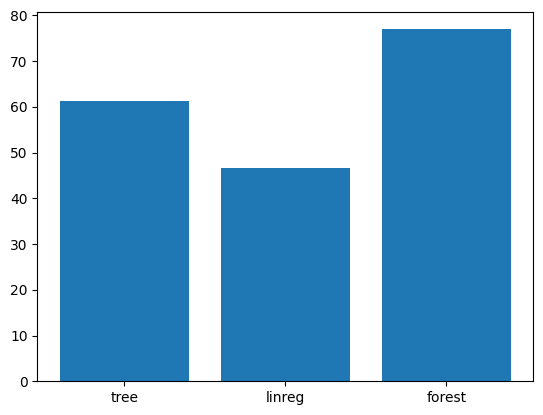

In [32]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

# Predictions

In [33]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif batting_team == 'Gujarat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif batting_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif bowling_team == 'Gujarat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif bowling_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

In [34]:
def score_predict2(batting_team, bowling_team, runs, wicketsa, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif batting_team == 'Gujarat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif batting_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif bowling_team == 'Gujarat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif bowling_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wicketsa, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [35]:
batting_team='Delhi Capitals'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 150 || Actual Score : 147


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [36]:
batting_team='Mumbai Indians'
bowling_team='Punjab Kings'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 190 || Actual Score : 176


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [37]:
batting_team="Punjab Kings"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 176 || Actual Score : 185


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [38]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 172 || Actual Score : 172


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5 
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [39]:
batting_team='Delhi Capitals'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 109 || Actual Score : 110


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 6
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [40]:
batting_team='Punjab Kings'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 149 || Actual Score : 153


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 7
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

In [41]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=0, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 151 || Actual Score : 146


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 8
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

92 92 92 92 92
Predicted Score : 224 || Actual Score : 222


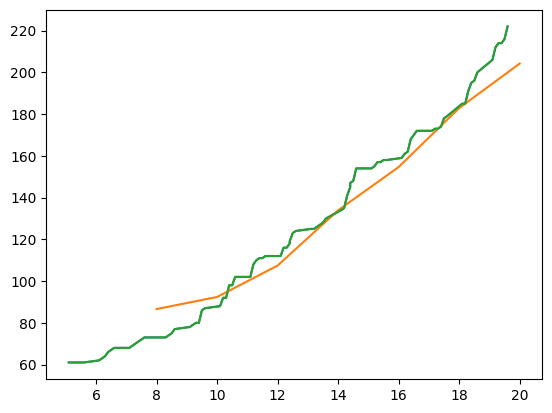

In [42]:
#batting_team = 'Gujarat Titans'
#bowling_team = 'Lucknow Super Giants'
#score = score_predict(batting_team, bowling_team, overs=9.4, runs=52, wickets=3, runs_last_5=24, wickets_last_5=1)
#print(f'Pridicted Score: {score} || Actual Score : 146')
batting_team="Kolkata Knight Riders"
bowling_team="Royal Challengers Bangalore"
overs5=[5.1,5.2,5.3,5.4,5.5,5.6,6.1,6.2,6.3,6.4,6.5,6.6,7.1,7.2,7.3,7.4,7.5,7.6,8.1,8.2,8.3,8.4,8.5,8.6,9.1,9.2,9.3,9.4,9.5,9.6,10.1,10.2,10.3,10.4,10.5,10.6,11.1,11.2,11.3,11.4,11.5,11.6,12.1,12.2,12.3,12.4,12.4,12.5,12.6,13.1,13.2,13.3,13.4,13.5,13.6,14.1,14.2,14.3,14.4,14.4,14.5,14.6,15.1,15.2,15.3,15.4,15.5,15.6,16.1,16.2,16.3,16.4,16.5,16.6,17.1,17.2,17.3,17.4,17.5,17.6,18.1,18.2,18.3,18.4,18.5,18.6,19.1,19.2,19.3,19.4,19.5,19.6]
runs5=[59,59,59,59,58,58,55,52,47,45,46,47,47,47,44,44,45,41,35,34,30,31,31,27,24,24,21,21,26,27,27,31,31,37,37,41,40,45,46,45,44,44,44,47,46,47,47,50,51,52,52,52,52,51,52,55,55,61,59,60,60,62,62,57,59,55,56,50,49,50,51,56,58,56,56,55,54,51,54,54,60,59,64,67,66,66,71,71,69,67,68,68]
runsc=[61,61,61,61,61,61,62,63,64,66,67,68,68,69,70,71,72,73,73,73,73,74,75,77,78,79,80,80,86,87,88,92,92,98,98,102,102,108,110,111,111,112,112,116,116,118,119,123,124,125,125,126,127,128,130,134,135,141,145,147,148,154,154,155,157,157,158,158,159,161,162,168,170,172,172,173,173,174,178,179,185,185,191,195,196,200,206,212,214,214,216,222,]
wicksc=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
wicks5=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(overs5),len(runs5),len(runsc),len(wicks5),len(wicks5))
Z=[]
a=[]
for i in range(0,92):
    a.append(runsc[i]/overs5[i])
a
    








total=222
balls=125
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
for i in range(0,len(overs5)):
    score = score_predict(batting_team, bowling_team, overs=overs5[i],runs=runsc[i], wickets=wicksc[i], runs_last_5=runs5[i], wickets_last_5=wicks5[i])
    Z.append(score)
print(f'Predicted Score : {score} || Actual Score : 222')
import chart_studio.plotly as py 
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#plt.plot(runsc,Z)
#plt.xlabel('Current score')
#plt.ylabel('Predicted score')
#plt.title('Current vs Predicted score for random forest model(this gave highest accuracy)')

'''fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
axes[1].plot(overs5,Z)
axes[1].plot(overs5,runs)
'''
r=0
#plt.plot(overs5,runsc)
plt.plot(overs5,runsc)
for i in range(84,92):
    r=r+a[i]
a.append(r/8)

def calculate_average(data):
    averages = []
    total_sum = 0

    for i, value in enumerate(data):
        total_sum += value

        if (i + 1) % 12 == 0:
            average = total_sum / 12
            averages.append(average)
            total_sum = 0

    return averages
b=calculate_average(a)
p=[]
#plt.plot(overs5,runs5)
v=[8,10,12,14,16,18,20]
for i in range(0,len(v)):
    p.append(b[i]*v[i])
plt.plot(v,p)
plt.plot(overs5,runsc)


# Export Model

In [53]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))